In [2]:
# Load Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 

# One-Hot Encoding

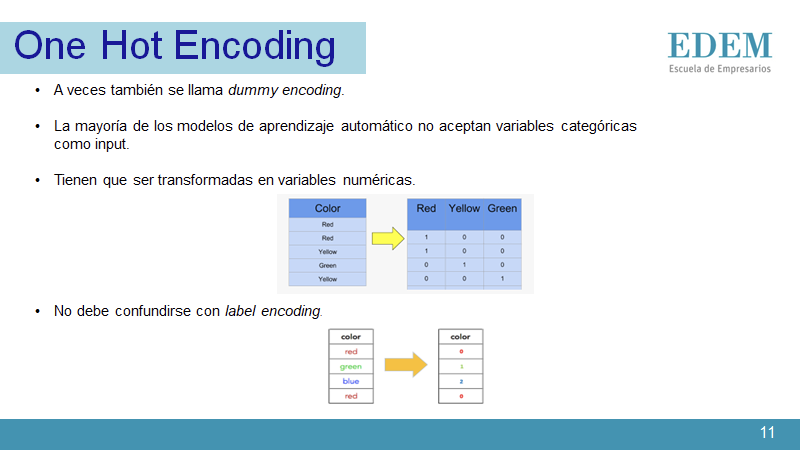

La mayoría de los modelos de aprendizaje automático (los árboles de decisión son una excepción) no admiten variables categóricas como entrada. Por lo tanto, estas variables deben transformarse en variables numéricas.

El enfoque estándar consiste en utilizar One-Hot Encoding o *dummy Encoding*.

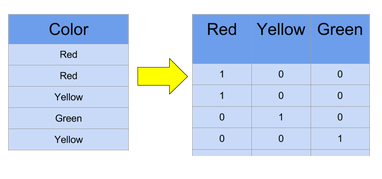

Recuerda que *label Encoding* no suele ser una buena opción, ya que está asumiendo un orden y unas distancias específicas en sus categorías. 

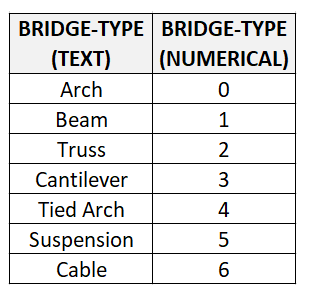

## Load Data

In [3]:
dat = pd.read_csv("../datasets/i2.csv", sep = ";")
dat.head()

,user,booking_date,origin_airport,price,sales channel,ant,airline
0,user5,01/11/2018,MAD,NaN,online,NaN,i2
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2


## One-hot Encoding

In [11]:
from sklearn.preprocessing import OneHotEncoder
?OneHotEncoder

In [12]:
dat.dtypes

user               object
booking_date       object
origin_airport     object
price             float64
sales channel      object
ant               float64
airline            object
dtype: object

In [13]:
categorical_vars = set(dat.columns[dat.dtypes == object])
numerical_vars = set(dat.columns) - categorical_vars
categorical_vars = list(categorical_vars)
numerical_vars = list(numerical_vars)
print(categorical_vars)
print(numerical_vars)

['sales channel', 'airline', 'origin_airport', 'booking_date', 'user']
['ant', 'price']


In [17]:
# 3 defining the model
ohe = OneHotEncoder(sparse = False, drop = 'first')

# 4) Training model
ohe.fit(dat[categorical_vars])

# 5) Predicting
dat_ohe = pd.DataFrame(ohe.fit_transform(dat[categorical_vars]))

# Optional
dat_ohe.columns = pd.DataFrame(ohe.get_feature_names())

In [18]:
dat[categorical_vars].head()

,sales channel,airline,origin_airport,booking_date,user
0,online,i2,MAD,01/11/2018,user5
1,online,i2,DUB,01/11/2018,user7
2,online,i2,TFS,02/11/2018,user4
3,online,i2,MAD,29/10/2018,user8
4,call center,i2,NaN,01/11/2018,user7


In [19]:
dat_ohe.head()

,"(x0_online,)","(x0_travel agency,)","(x2_AGP,)","(x2_ALC,)","(x2_AMS,)","(x2_BHX,)","(x2_BOD,)","(x2_BPS,)","(x2_BRU,)","(x2_CAG,)",...,"(x3_31/10/2018,)","(x4_user10,)","(x4_user2,)","(x4_user3,)","(x4_user4,)","(x4_user5,)","(x4_user6,)","(x4_user7,)","(x4_user8,)","(x4_user9,)"
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Si desea eliminar la columna redundante, debe especificar el argumento drop.

In [9]:
ohe = OneHotEncoder(drop = 'first', sparse = False)
ohe.fit(dat[categorical_vars])
dat_ohe = pd.DataFrame(ohe.fit_transform(dat[categorical_vars]))
dat_ohe.columns = pd.DataFrame(ohe.get_feature_names())
dat_ohe.head()

,"(x0_online,)","(x0_travel agency,)","(x1_user10,)","(x1_user2,)","(x1_user3,)","(x1_user4,)","(x1_user5,)","(x1_user6,)","(x1_user7,)","(x1_user8,)",...,"(x2_TLS,)","(x2_TXL,)","(x2_VGO,)","(x2_XRY,)","(x2_nan,)","(x3_02/11/2018,)","(x3_03/11/2018,)","(x3_29/10/2018,)","(x3_30/10/2018,)","(x3_31/10/2018,)"
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Recuperamos las variables numéricas.

In [20]:
dat_new = pd.concat((dat_ohe, dat[numerical_vars].reset_index()), axis=1)

In [21]:
dat_new

,"(x0_online,)","(x0_travel agency,)","(x2_AGP,)","(x2_ALC,)","(x2_AMS,)","(x2_BHX,)","(x2_BOD,)","(x2_BPS,)","(x2_BRU,)","(x2_CAG,)",...,"(x4_user3,)","(x4_user4,)","(x4_user5,)","(x4_user6,)","(x4_user7,)","(x4_user8,)","(x4_user9,)",index,ant,price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,38.0,147.500000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,19.0,24.049999
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,8.0,59.709999
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4.0,37.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,995,29.0,NaN
996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,996,39.0,NaN
997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,997,5.0,NaN
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,998,4.0,NaN


In [22]:
dat_new.dtypes

(x0_online,)           float64
(x0_travel agency,)    float64
(x2_AGP,)              float64
(x2_ALC,)              float64
(x2_AMS,)              float64
                        ...   
(x4_user8,)            float64
(x4_user9,)            float64
index                    int64
ant                    float64
price                  float64
Length: 71, dtype: object

Si queremos utilizar LabelEncoder (aunque no deberíamos ;p)

In [23]:
from sklearn.preprocessing import LabelEncoder
?LabelEncoder

In [25]:
# 3 defining the model
ohe = LabelEncoder()

# Predicting
new_column = ohe.fit_transform(dat['sales channel'])

In [26]:
new_column

array([1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1,
       2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2,

In [27]:
dat_new = dat.copy()
dat_new['sales channel'] = new_column;
dat_new

,user,booking_date,origin_airport,price,sales channel,ant,airline
0,user5,01/11/2018,MAD,NaN,1,NaN,i2
1,user7,01/11/2018,DUB,147.500000,1,38.0,i2
2,user4,02/11/2018,TFS,24.049999,1,19.0,i2
3,user8,29/10/2018,MAD,59.709999,1,8.0,i2
4,user7,01/11/2018,NaN,37.299999,0,4.0,i2
...,...,...,...,...,...,...,...
995,user2,01/11/2018,JMK,NaN,1,29.0,i2
996,user10,01/11/2018,SVQ,NaN,1,39.0,i2
997,user4,30/10/2018,MAD,NaN,1,5.0,i2
998,user10,02/11/2018,CDG,NaN,1,4.0,i2


In [ ]:
dat_new.dtypes

user               object
booking_date       object
origin_airport     object
price             float64
sales channel       int32
ant               float64
airline            object
dtype: object

## Definir Función

In [28]:
def one_hot(X, categorical_variables):
    # 3 defining the model
    ohe = OneHotEncoder(sparse = False)

    # Training model
    ohe.fit([categorical_variables])

    # Predicting
    X_ohe = pd.DataFrame(ohe.fit_transform(X[categorical_variables]))
    
    # Optional
    X_ohe.columns = pd.DataFrame(ohe.get_feature_names())
    
    # Final value
    X.drop(categorical_variables, axis = 1)
    X = pd.concat([X, X_ohe], axis = 1)

    return X

In [29]:
dat_new = one_hot(dat, categorical_vars)
dat_new

,user,booking_date,origin_airport,price,sales channel,ant,airline,"(x0_call center,)","(x0_online,)","(x0_travel agency,)",...,"(x4_user1,)","(x4_user10,)","(x4_user2,)","(x4_user3,)","(x4_user4,)","(x4_user5,)","(x4_user6,)","(x4_user7,)","(x4_user8,)","(x4_user9,)"
0,user5,01/11/2018,MAD,NaN,online,NaN,i2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,user7,01/11/2018,DUB,147.500000,online,38.0,i2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,user4,02/11/2018,TFS,24.049999,online,19.0,i2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,user8,29/10/2018,MAD,59.709999,online,8.0,i2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,user7,01/11/2018,NaN,37.299999,call center,4.0,i2,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,user2,01/11/2018,JMK,NaN,online,29.0,i2,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,user10,01/11/2018,SVQ,NaN,online,39.0,i2,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,user4,30/10/2018,MAD,NaN,online,5.0,i2,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
998,user10,02/11/2018,CDG,NaN,online,4.0,i2,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Pregunta:** ¿Qué ocurre si tienes cientos de columnas categóricas, cada una con miles de categorías?

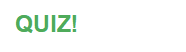